In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
df = pd.read_csv('marketing.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Variable Encoding

### Response

In [3]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Engaged'].value_counts()

Engaged
0    7826
1    1308
Name: count, dtype: int64

## Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

### Creating Dummy Variables

In [6]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

encoded_df = pd.get_dummies(df[columns_to_encode]) #直接把columns_to_encode的欄位進行one-hot encoding
encoded_df

,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,...,Marital Status_Married,Marital Status_Single,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,True,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
1,True,False,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,False,False,True,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
4,True,False,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,True,False,True,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
9130,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
9131,False,True,False,False,False,True,False,True,False,False,...,False,True,True,False,False,False,False,False,True,False
9132,False,True,False,False,True,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False


Save the columns after one-hot encoding.

In [7]:
categorical_features = encoded_df.columns.to_list()

Merge the columns with the original dataframe.

In [8]:
df = pd.concat([df, encoded_df], axis=1)

### Encoding Gender with Label Encoding

In [9]:
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})
categorical_features.append("Gender")

### All Features and Response

In [10]:
# X 特徵值欄位

all_features = continuous_features + categorical_features

## Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[all_features], df["Engaged"], test_size=0.3)

X_train.shape
X_test.shape

(2741, 50)

### Training a Neural Network Model

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(40, input_dim=len(all_features), activation="relu6"))
model.add(Dense(20, activation="relu6"))
model.add(Dense(10, activation="relu6"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=72, batch_size=64)


Epoch 1/72
  3/100 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.2431 - loss: 1.6323 

/Volumes/Dev/nkust/nkust-homework/semester-5/business-platform-design/ch13/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7779 - loss: 0.6219
Epoch 2/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8443 - loss: 0.4272
Epoch 3/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8532 - loss: 0.4121
Epoch 4/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8454 - loss: 0.4221
Epoch 5/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.8559 - loss: 0.4056
Epoch 6/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8480 - loss: 0.4183
Epoch 7/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8564 - loss: 0.4061
Epoch 8/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8569 - loss: 0.4018
Epoch 9/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8521 - loss: 0.4128
Epoch 10/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.8626 - loss: 0.3920
Epoch 11/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.8520 - loss: 0.4094
Epoch 12/72
100/100 ━━━━━━━━━━━━━━━━━━━━ 

### Accuracy, Precision, Recall, and F1 Score

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]


print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds, zero_division=0))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds, zero_division=0))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
In-Sample Accuracy: 0.8531
Out-of-Sample Accuracy: 0.8654


In-Sample Precision: 0.0000
Out-of-Sample Precision: 0.0000


In-Sample Recall: 0.0000
Out-of-Sample Recall: 0.0000


### ROC and AUC

In [15]:
from sklearn.metrics import auc, roc_curve

in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]


in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)


in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
In-Sample AUC: 0.5800
Out-Sample AUC: 0.5741


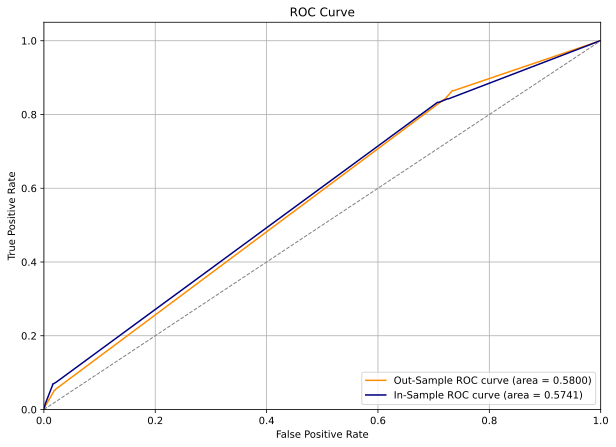

In [16]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()